In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
data = pd.read_csv('customer.csv')

In [177]:
data

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [178]:
data["cinsiyyət"].value_counts()

,count
cinsiyyət,
Kişi,3508
Qadın,3435


In [179]:
data['Ümumi ödənişlər'].value_counts()

,count
Ümumi ödənişlər,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [180]:
print(data['Ümumi ödənişlər'].dtype)
print(data['Ümumi ödənişlər'].unique()[:10])  # top 10 unique

object
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [181]:
data['Ümumi ödənişlər'] = pd.to_numeric(data['Ümumi ödənişlər'], errors='coerce')

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          6943 non-null   object 
 2   Yaşlı təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           6943 non-null   object 
 4   asılı olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   Telefon Xidməti                    7043 non-null   object 
 7   Birdən çox xətt                    7043 non-null   object 
 8   İnternet servisi                   7043 non-null   object 
 9   onlayn təhlükəsizlik               7043 non-null   object 
 10  onlayn yedəkləmə                   7043 non-null   object 
 11  Cihazın Mühafizəsi                 7043 non-null   objec

In [183]:
data.describe()

,Yaşlı təbəqə,müddəti,Aylıq Ödənişlər,Ümumi ödənişlər
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [184]:
Q1 = data['Ümumi ödənişlər'].quantile(0.25)
Q3 = data['Ümumi ödənişlər'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Ümumi ödənişlər'] < lower_bound) | (data['Ümumi ödənişlər'] > upper_bound)]

print("Outlier-lərin sayı:", outliers.shape[0])
print(outliers)


Outlier-lərin sayı: 0
Empty DataFrame
Columns: [id, cinsiyyət, Yaşlı təbəqə, tərəfdaş, asılı olanlar, müddəti, Telefon Xidməti, Birdən çox xətt, İnternet servisi, onlayn təhlükəsizlik, onlayn yedəkləmə, Cihazın Mühafizəsi, texniki dəstək, canli tv, filmlər, müqavilə, Kağızsız Hesablaşma, ödəniş metodu, Aylıq Ödənişlər, Ümumi ödənişlər, Churn, TelefonXidməti,KağızsızHesablaşma]
Index: []

[0 rows x 22 columns]


In [185]:
print(data[['Ümumi ödənişlər', 'Aylıq Ödənişlər', 'müddəti']].dtypes)

Ümumi ödənişlər    float64
Aylıq Ödənişlər    float64
müddəti              int64
dtype: object


In [186]:
print(data['Churn'].unique())

['Yox' 'Hə']


In [187]:
data.loc[data.Churn == "Yox", "Churn"] = 0 #not churn
data.loc[data.Churn == "Hə", "Churn"] = 1 #churn customers

In [188]:
data["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


Lets cleaning nan values

In [189]:
data.isnull().sum()

,0
id,0
cinsiyyət,100
Yaşlı təbəqə,0
tərəfdaş,100
asılı olanlar,0
müddəti,0
Telefon Xidməti,0
Birdən çox xətt,0
İnternet servisi,0
onlayn təhlükəsizlik,0


In [190]:
data["cinsiyyət"] = data["cinsiyyət"].fillna("məlum deyil")
data["tərəfdaş"] = data["tərəfdaş"].fillna("məlum deyil")

data = data.dropna(subset=["Ümumi ödənişlər"])

In [191]:
data.isnull().sum()

,0
id,0
cinsiyyət,0
Yaşlı təbəqə,0
tərəfdaş,0
asılı olanlar,0
müddəti,0
Telefon Xidməti,0
Birdən çox xətt,0
İnternet servisi,0
onlayn təhlükəsizlik,0


In [192]:
data = data.replace("Teleon xidmeti yoxdur", "Telefon xidmeti yoxdur")

In [193]:
data["TelefonXidməti,KağızsızHesablaşma"].value_counts()

,count
"TelefonXidməti,KağızsızHesablaşma",
Hə Hə,3782
Hə Yox,2570
Yox Hə,386
Yox Yox,294


In [194]:
data = data.drop(columns=["TelefonXidməti,KağızsızHesablaşma", "id"])

In [195]:
data['müddəti'].value_counts()

,count
müddəti,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


In [197]:
def recency_group_v2(x):
    if x <= 7:
        return 'Çox yaxın'
    elif x <= 30:
        return 'Yaxın'
    elif x <= 60:
        return 'Orta'
    elif x <= 120:
        return 'Biraz Uzaq'
    else:
        return 'Çox uzaq / Inaktiv'

data['recency_group'] = data['müddəti'].apply(recency_group_v2)

data['recency_group'], _ = pd.factorize(data['recency_group'])
data['recency_odeme_interaction'] = data['recency_group'] * data['Aylıq Ödənişlər']

In [198]:
data

,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,...,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,recency_group,recency_odeme_interaction
0,Qadın,0,Hə,Yox,1,Yox,Telefon xidmeti yoxdur,DSL,Yox,Hə,...,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,0,0,0.00
1,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,Yox,...,Yox,Yox,illik,Yox,mail cek,56.95,1889.50,0,1,56.95
2,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,Hə,...,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,1,0,0.00
3,Kişi,0,Yox,Yox,45,Yox,Telefon xidmeti yoxdur,DSL,Hə,Yox,...,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,0,1,42.30
4,məlum deyil,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,Yox,...,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,Yox,...,Hə,Hə,illik,Hə,mail cek,84.80,1990.50,0,2,169.60
7039,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,Hə,...,Hə,Hə,illik,Hə,kredit karti,103.20,7362.90,0,3,309.60
7040,Qadın,0,Hə,Hə,11,Yox,Telefon xidmeti yoxdur,DSL,Hə,Yox,...,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,0,2,59.20
7041,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,Yox,...,Yox,Yox,ayliq,Hə,mail cek,74.40,306.60,1,0,0.00


<ipython-input-202-e3730729d1ff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='recency_group', y='Churn', ci=None)


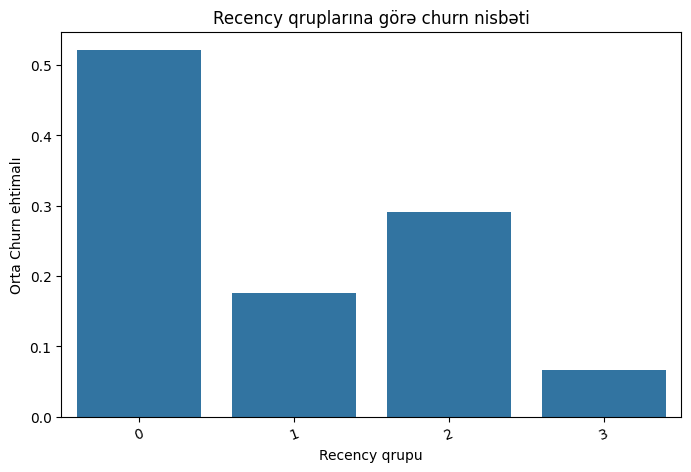

In [202]:

plt.figure(figsize=(8,5))
sns.barplot(data=data, x='recency_group', y='Churn', ci=None)
plt.title("Recency qruplarına görə churn nisbəti")
plt.ylabel("Orta Churn ehtimalı")
plt.xlabel("Recency qrupu")
plt.xticks(rotation=20)
plt.show()


In [203]:
data['recency_qrupu_metn'] = data['recency_group'].map({0: 'Çox yaxın', 1: 'Yaxın', 2: 'Orta', 3: 'Uzaq', 4: 'Çox uzaq / İnaktiv'})

In [204]:
data.columns

Index(['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar', 'müddəti',
       'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'recency_group',
       'recency_odeme_interaction', 'recency_qrupu_metn'],
      dtype='object')

In [205]:
def payment_method_group(payment):
    if payment in ['elektronik cek', 'mail cek']:
        return 'manual'
    elif payment in ['kredit karti', 'bank transfer']:
        return 'auto'
    else:
        return 'other'

data['payment_method_group'] = data['ödəniş metodu'].apply(payment_method_group)


data['payment_method_group'], _ = pd.factorize(data['payment_method_group'])


categ_cols = data.select_dtypes(include=['object']).columns

for c in categ_cols:
    data[c], _ = pd.factorize(data[c])

data.head()


,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,...,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,recency_group,recency_odeme_interaction,recency_qrupu_metn,payment_method_group
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,29.85,29.85,0,0,0.00,0,0
1,1,0,1,0,34,1,1,0,1,1,...,1,1,1,56.95,1889.50,0,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,...,0,0,1,53.85,108.15,1,0,0.00,0,0
3,1,0,1,0,45,0,0,0,1,1,...,1,1,2,42.30,1840.75,0,1,42.30,1,1
4,2,0,1,0,2,1,1,1,0,1,...,0,0,0,70.70,151.65,1,0,0.00,0,0


In [206]:
from scipy.stats import pointbiserialr

for col in ['müddəti', 'Aylıq Ödənişlər', 'Ümumi ödənişlər']:
    corr, p_value = pointbiserialr(data[col].dropna(), data['Churn'].loc[data[col].notna()])
    print(f"{col}: correlation={corr:.2f}, p-value={p_value:.4f}")


müddəti: correlation=-0.35, p-value=0.0000
Aylıq Ödənişlər: correlation=0.19, p-value=0.0000
Ümumi ödənişlər: correlation=-0.20, p-value=0.0000


Modelling

In [207]:
data = data.drop(columns=['müddəti', 'recency_qrupu_metn'])

In [208]:
data.describe()

,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,Cihazın Mühafizəsi,...,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,recency_group,recency_odeme_interaction,payment_method_group
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.526451,0.162400,0.538680,0.298493,0.903299,1.325228,0.872582,0.718857,0.871303,0.776166,...,0.820677,0.688567,0.407281,1.315557,64.798208,2283.300441,0.265785,1.461035,100.269994,0.435580
std,0.527050,0.368844,0.526023,0.457629,0.295571,0.642585,0.737271,0.796556,0.737917,0.778542,...,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782,1.050788,94.869859,0.495868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,1.000000,20.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,1.000000,79.075000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000,2.000000,159.300000,1.000000
max,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000,3.000000,356.250000,1.000000


In [209]:
data['recency_group'].value_counts()

,count
recency_group,
2,2029
1,1995
0,1601
3,1407


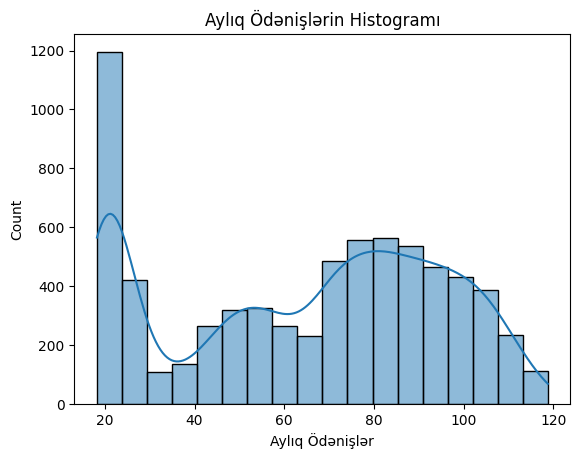

In [210]:
sns.histplot(data['Aylıq Ödənişlər'], kde=True)
plt.title("Aylıq Ödənişlərin Histogramı")
plt.show()


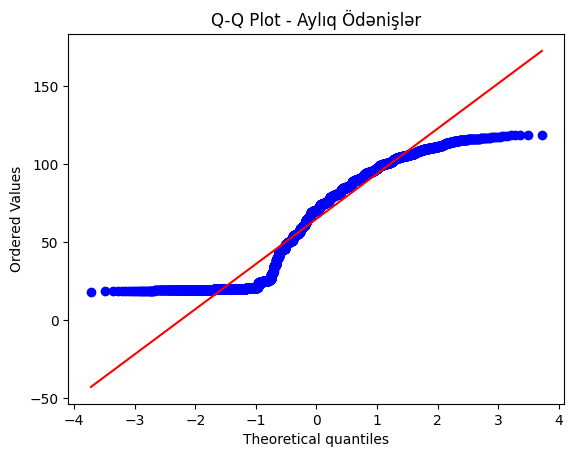

In [211]:
import scipy.stats as stats

stats.probplot(data['Aylıq Ödənişlər'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Aylıq Ödənişlər")
plt.show()


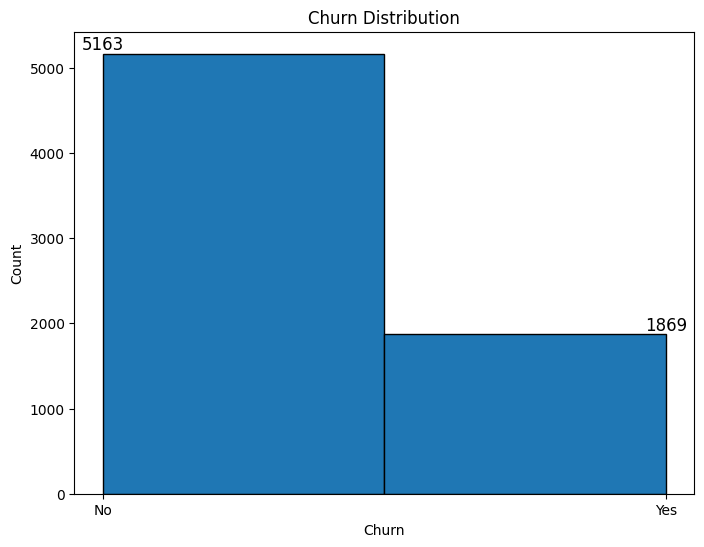

In [225]:
plt.figure(figsize=(8,6))
plt.hist(data["Churn"], bins=2, edgecolor='black')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])

# adding 0 and 1 to Churn
churn_counts = data["Churn"].value_counts()
for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.title("Churn Distribution")
plt.show()


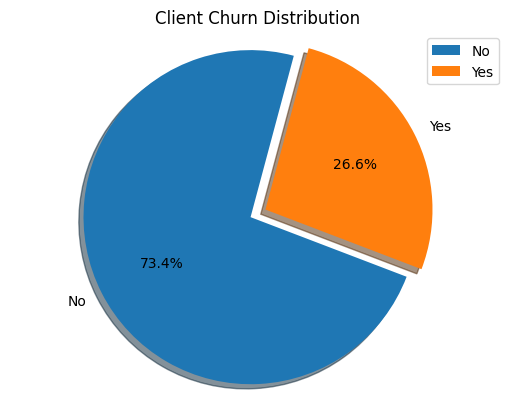

In [226]:
sizes=[5174,1879]
labels="No","Yes"
explode=(0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',labels=labels, shadow=True, startangle=75)
ax1.axis('equal')
ax1.set_title("Client Churn Distribution")
ax1.legend(labels)
plt.show()


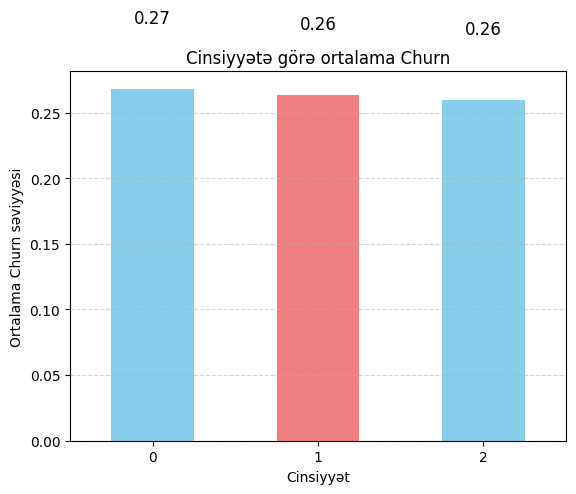

In [227]:
import matplotlib.pyplot as plt

# Churn by genderrrrr
churn_means = data.groupby("cinsiyyət")["Churn"].mean()

# Bar plot
ax = churn_means.plot(kind="bar", color=["skyblue", "lightcoral"])

plt.title("Cinsiyyətə görə ortalama Churn")
plt.xlabel("Cinsiyyət")
plt.ylabel("Ortalama Churn səviyyəsi")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, value in enumerate(churn_means):
    ax.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=12)

plt.show()


# Robust Scaler and Min-Max Scaler

In [212]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler


minmax_scaler = MinMaxScaler()

robust_scaler = RobustScaler()

data['Aylıq Ödənişlər_scaled'] = minmax_scaler.fit_transform(data[['Aylıq Ödənişlər']])

data['Ümumi ödənişlər_scaled'] = robust_scaler.fit_transform(data[['Ümumi ödənişlər']])

data.drop(columns=['Aylıq Ödənişlər', 'Ümumi ödənişlər'], inplace=True)

In [213]:
data.columns

Index(['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Churn', 'recency_group',
       'recency_odeme_interaction', 'payment_method_group',
       'Aylıq Ödənişlər_scaled', 'Ümumi ödənişlər_scaled'],
      dtype='object')

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cinsiyyət                  7032 non-null   int64  
 1   Yaşlı təbəqə               7032 non-null   int64  
 2   tərəfdaş                   7032 non-null   int64  
 3   asılı olanlar              7032 non-null   int64  
 4   Telefon Xidməti            7032 non-null   int64  
 5   Birdən çox xətt            7032 non-null   int64  
 6   İnternet servisi           7032 non-null   int64  
 7   onlayn təhlükəsizlik       7032 non-null   int64  
 8   onlayn yedəkləmə           7032 non-null   int64  
 9   Cihazın Mühafizəsi         7032 non-null   int64  
 10  texniki dəstək             7032 non-null   int64  
 11  canli tv                   7032 non-null   int64  
 12  filmlər                    7032 non-null   int64  
 13  müqavilə                   7032 non-null   int64  
 1

Modelling and Smote Sampling

In [215]:
pip install imblearn

In [216]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

y = data['Churn']
X = data.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

lr_pred = lr_model.predict(X_test)

print("Dəqiqlik (Accuracy):", accuracy_score(y_test, lr_pred))
print("Logistc Regression :\n", classification_report(y_test, lr_pred))


Dəqiqlik (Accuracy): 0.736318407960199
Logistc Regression :
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2']
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

print("Ən yaxşı parametrlər:", grid_search.best_params_)


best_lr_model = grid_search.best_estimator_


y_pred = best_lr_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Dəqiqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("Logistic with Grid Search:\n", classification_report(y_test, y_pred))


Ən yaxşı parametrlər: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Dəqiqlik (Accuracy): 0.736318407960199
Logistic with Grid Search:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:00:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ən yaxşı parametrlər: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

ROC-AUC: 0.8356003230298543


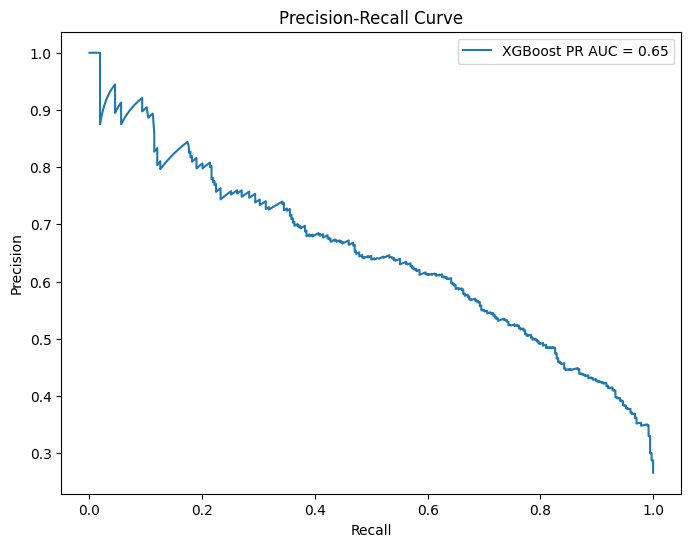

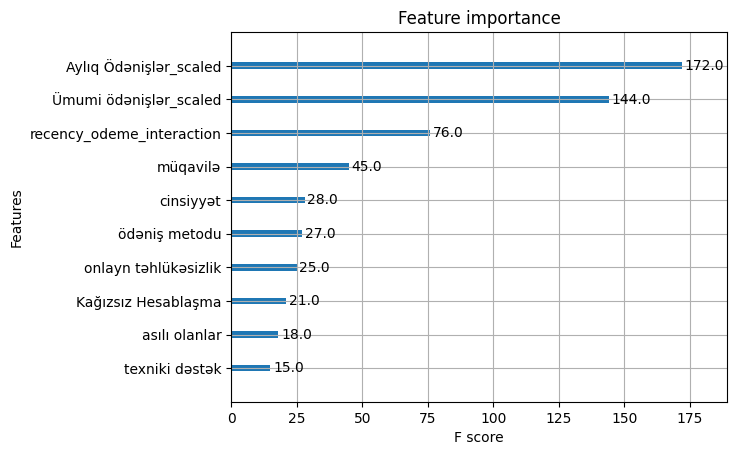

In [222]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, auc

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("XGBoost ən yaxşı parametrlər:", grid_xgb.best_params_)

y_pred_xgb = grid_xgb.predict(X_test)
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'XGBoost PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Feature importance
xgb.plot_importance(grid_xgb.best_estimator_, max_num_features=10)
plt.show()


In [224]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8,
    'eval_metric': 'logloss'
}


model = XGBClassifier(**params)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    y_proba = model.predict_proba(X_test_fold)[:, 1]

    accuracies.append(accuracy_score(y_test_fold, y_pred))
    precisions.append(precision_score(y_test_fold, y_pred))
    recalls.append(recall_score(y_test_fold, y_pred))
    f1s.append(f1_score(y_test_fold, y_pred))
    roc_aucs.append(roc_auc_score(y_test_fold, y_proba))

print(f"Orta Accuracy: {np.mean(accuracies):.4f}")
print(f"Orta Precision: {np.mean(precisions):.4f}")
print(f"Orta Recall: {np.mean(recalls):.4f}")
print(f"Orta F1-score: {np.mean(f1s):.4f}")
print(f"Orta ROC-AUC: {np.mean(roc_aucs):.4f}")


Orta Accuracy: 0.8050
Orta Precision: 0.6690
Orta Recall: 0.5281
Orta F1-score: 0.5902
Orta ROC-AUC: 0.8468
